In [22]:
# Import modules from Scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split   # Import train_test_split function
from sklearn import metrics   # import metrics modules for accuracy calculation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns 

# Baseline MLP Binary Classification Experiment on Big Data

This experiment focuses on classifying LOS from NLOS condition 

In [5]:
PATH = "../../my_data/identification-dataset/my_custom_data/big-identification-dataset.csv"
df = pd.read_csv(PATH)

df.dropna(inplace=True)

In [6]:
# Create a pipeline object for the model
pipe_MLP = make_pipeline(StandardScaler(),
                         MLPClassifier(solver='adam',
                                       hidden_layer_sizes=(100,100,100,100),
                                       random_state=0,
                                       max_iter=500,           # TODO: tune it later
                                       verbose=True
                                       )
                         )

In [7]:
df.NLOS_material.unique()

array([1, 0, 2, 3, 4, 5, 6])

In [8]:
split_df = pd.get_dummies(df['NLOS_material'], prefix='value')

In [9]:
df = pd.concat([df, split_df], axis=1)

In [10]:
df.head()

,tdoa,snr_an,power_dif,rx_snr,rx_powerdif,tof,material,NLOS_material,value_0,value_1,value_2,value_3,value_4,value_5,value_6
0,-0.211129,145.678574,10.307022,215.300003,11.049919,5.009119,cardboard,1,0,1,0,0,0,0,0
1,-0.197054,134.321426,10.824654,192.000000,11.397888,5.027886,cardboard,1,0,1,0,0,0,0,0
2,-0.197054,134.321426,10.824654,236.149994,9.844360,5.065420,cardboard,1,0,1,0,0,0,0,0
3,-0.248663,104.107140,11.064209,236.149994,9.844360,5.065420,cardboard,1,0,1,0,0,0,0,0
4,-0.182979,113.250000,10.954155,185.000000,10.330307,5.027886,cardboard,1,0,1,0,0,0,0,0


In [11]:
# Extracted features 
X = df[['tdoa', 'snr_an', 'power_dif', 'rx_snr', 'rx_powerdif', 'tof']]
y = df['value_0'] # Labels

In [12]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [13]:
# Train the whole pipeline
pipe_MLP.fit(X_train, y_train)

Iteration 1, loss = 0.03627428
Iteration 2, loss = 0.00562252
Iteration 3, loss = 0.00363519
Iteration 4, loss = 0.00359215
Iteration 5, loss = 0.00313355
Iteration 6, loss = 0.00268024
Iteration 7, loss = 0.00268497
Iteration 8, loss = 0.00246947
Iteration 9, loss = 0.00230752
Iteration 10, loss = 0.00239312
Iteration 11, loss = 0.00238972
Iteration 12, loss = 0.00229781
Iteration 13, loss = 0.00219913
Iteration 14, loss = 0.00205391
Iteration 15, loss = 0.00198409
Iteration 16, loss = 0.00203211
Iteration 17, loss = 0.00173644
Iteration 18, loss = 0.00183389
Iteration 19, loss = 0.00186365
Iteration 20, loss = 0.00173600
Iteration 21, loss = 0.00158147
Iteration 22, loss = 0.00149215
Iteration 23, loss = 0.00228695
Iteration 24, loss = 0.00141023
Iteration 25, loss = 0.00146695
Iteration 26, loss = 0.00181462
Iteration 27, loss = 0.00137416
Iteration 28, loss = 0.00154970
Iteration 29, loss = 0.00127421
Iteration 30, loss = 0.00122589
Iteration 31, loss = 0.00113436
Iteration 32, los

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100),
                               max_iter=500, random_state=0, verbose=True))])

In [14]:
# Make predictions on the test data
y_pred = pipe_MLP.predict(X_test)

In [15]:
# Caluclate the accuracy on test data predicitons
print(f'Test Accuracy: {metrics.accuracy_score(y_test, y_pred) * 100}%')

Test Accuracy: 99.94432691237056%


In [17]:
print(f'Test Precision: {metrics.precision_score(y_test, y_pred) * 100}%')

Test Precision: 99.95557776667222%


In [18]:
print(f'Test Recall: {metrics.recall_score(y_test, y_pred) * 100}%')

Test Recall: 99.93338144673291%


In [19]:
print(f'Test F1: {metrics.f1_score(y_test, y_pred)}')

Test F1: 0.9994447837432681


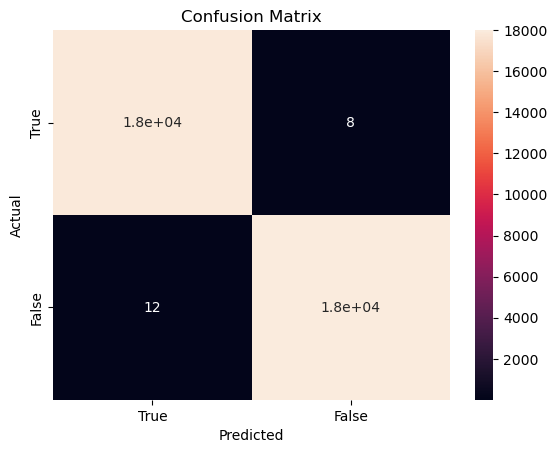

In [24]:
cm = confusion_matrix(y_test, y_pred)
axis_labels = ['True', 'False']
plt.figure()
sns.heatmap(cm, annot=True, xticklabels=axis_labels, yticklabels=axis_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

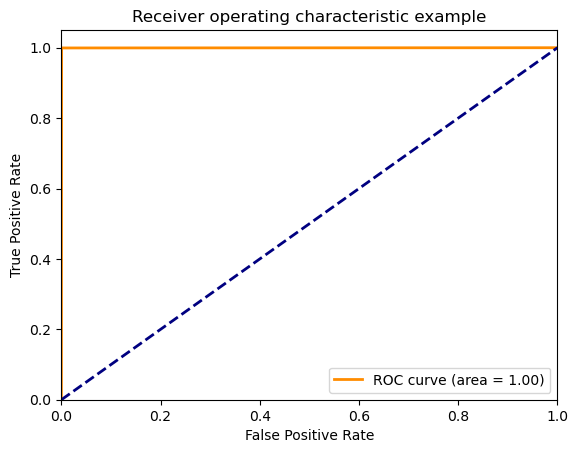

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()